In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from common.data_frame_columns import PM10, PM2_5, PM1
from common.date_time_helper import convert_to_datetime
from common.endpoints_urls import endpoints_config
from common.working_dataset_config import working_datetime, test_date_time_strings
from data_management.data_crawler import DataManager
from data_management.data_reshaper import reshape_data, prepare_dataset, flatten_data
from data_management.labeled_data_generator import LabeledDataGenerator, DataLabel
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [6]:
date_strings = ['01.01.2021 00:00', '31.12.2023 23:59']
test_dates_string = ['01.01.2024 00:00', '30.04.2024 23:59']

training_dates = [convert_to_datetime(date_strings[0]), convert_to_datetime(date_strings[1])]
test_dates = [convert_to_datetime(test_dates_string[0]), convert_to_datetime(test_dates_string[1])]

datas = DataManager(True).get_all_endpoints_data(endpoints_config, update=False)

column = PM10
L = LabeledDataGenerator(column)

test_data = L.generate_labeled_data(datas[:1], test_dates[0], test_dates[1], 40)
single_data = L.generate_labeled_data(datas[:1], training_dates[0], training_dates[1], 40)
multi_data = L.generate_labeled_data(datas, training_dates[0], training_dates[1], 40)

Loading station data: Gronie  https://datahub.ki.agh.edu.pl/api/endpoints/70/data/
    # Minimal data: 2022-07-13 23:38:02+00:00
    # Maximal data: 2024-05-10 16:16:39+00:00
Loading station data: Urząd Gminy  https://datahub.ki.agh.edu.pl/api/endpoints/71/data/
    # Minimal data: 2023-10-28 07:17:18+00:00
    # Maximal data: 2024-05-10 16:15:37+00:00
Loading station data: Młynne  https://datahub.ki.agh.edu.pl/api/endpoints/72/data/
    # Minimal data: 2022-02-12 21:11:18+00:00
    # Maximal data: 2024-05-10 16:15:59+00:00
Loading station data: Sucharskiego  https://datahub.ki.agh.edu.pl/api/endpoints/73/data/
    # Minimal data: 2021-10-07 19:41:43+00:00
    # Maximal data: 2024-05-10 16:19:11+00:00
Loading station data: Twardowskiego  https://datahub.ki.agh.edu.pl/api/endpoints/74/data/
    # Minimal data: 2021-10-07 20:59:56+00:00
    # Maximal data: 2024-05-10 16:20:04+00:00
Loading station data: Konopnickiej  https://datahub.ki.agh.edu.pl/api/endpoints/75/data/
    # Minimal data

In [7]:
class MyMLPClassifier:
    def __init__(self):
        self.xdxd = MLPClassifier()

    def fit_data(self, labeled_data, column):
        X, y = prepare_dataset(labeled_data, column)
        X = flatten_data(X)
        self.xdxd.fit(X, y)

    def test_accuracy(self, labeled_data, column):
        X_set, y_set = prepare_dataset(labeled_data, column)
        X_set = flatten_data(X_set)
        predicted = self.xdxd.predict(X_set)
        accuracy = accuracy_score(y_set, predicted)
        precision = precision_score(y_set, predicted, average='weighted')
        recall = recall_score(y_set, predicted, average='weighted')
        f1 = f1_score(y_set, predicted, average='weighted', zero_division=np.nan)

        return accuracy, precision, recall, f1

{'name': 'mlp_SDSC', 'accuracy': 0.48514851485148514, 'precision': 0.5595496831913156, 'recall': 0.48514851485148514, 'f1': 0.50552200484896}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'name': 'mlp_SDMC', 'accuracy': 0.801980198019802, 'precision': 0.8228901461574728, 'recall': 0.801980198019802, 'f1': 0.7640924363515387}
{'name': 'mlp_MDSC', 'accuracy': 0.46534653465346537, 'precision': 0.49519715129407665, 'recall': 0.46534653465346537, 'f1': 0.44853347499412294}
{'name': 'mlp_MDMC', 'accuracy': 0.7920792079207921, 'precision': 0.7732580037664782, 'recall': 0.7920792079207921, 'f1': 0.7682315894884794}


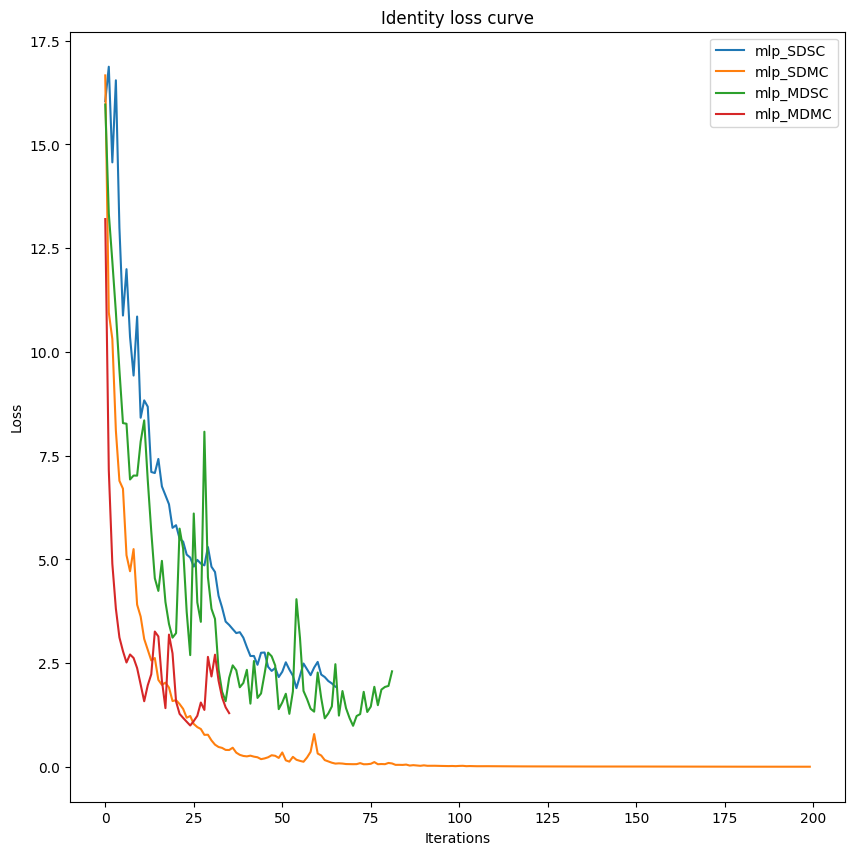

/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'name': 'mlp_SDSC', 'accuracy': 0.5841584158415841, 'precision': 0.5979952032470328, 'recall': 0.5841584158415841, 'f1': 0.5398847124531457}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'name': 'mlp_SDMC', 'accuracy': 0.7821782178217822, 'precision': 0.7815031503150316, 'recall': 0.7821782178217822, 'f1': 0.7325424802542174}
{'name': 'mlp_MDSC', 'accuracy': 0.693069306930693, 'precision': 0.6345758105222287, 'recall': 0.693069306930693, 'f1': 0.6345197322041457}
{'name': 'mlp_MDMC', 'accuracy': 0.8118811881188119, 'precision': 0.7835356116256786, 'recall': 0.8118811881188119, 'f1': 0.773379698218269}


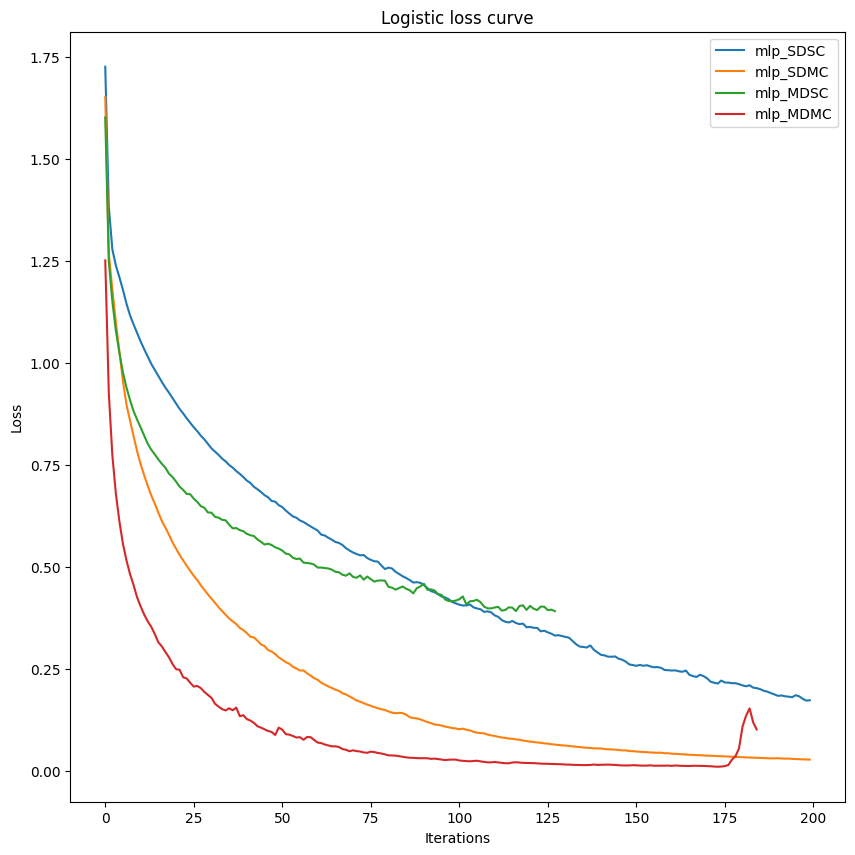

/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'name': 'mlp_SDSC', 'accuracy': 0.594059405940594, 'precision': 0.5842641956503344, 'recall': 0.594059405940594, 'f1': 0.5523275818517279}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'name': 'mlp_SDMC', 'accuracy': 0.7623762376237624, 'precision': 0.7381638163816382, 'recall': 0.7623762376237624, 'f1': 0.7123965028081755}
{'name': 'mlp_MDSC', 'accuracy': 0.6435643564356436, 'precision': 0.61993699369937, 'recall': 0.6435643564356436, 'f1': 0.6038574888006271}
{'name': 'mlp_MDMC', 'accuracy': 0.7722772277227723, 'precision': 0.7045418827597044, 'recall': 0.7722772277227723, 'f1': 0.7225728932193696}


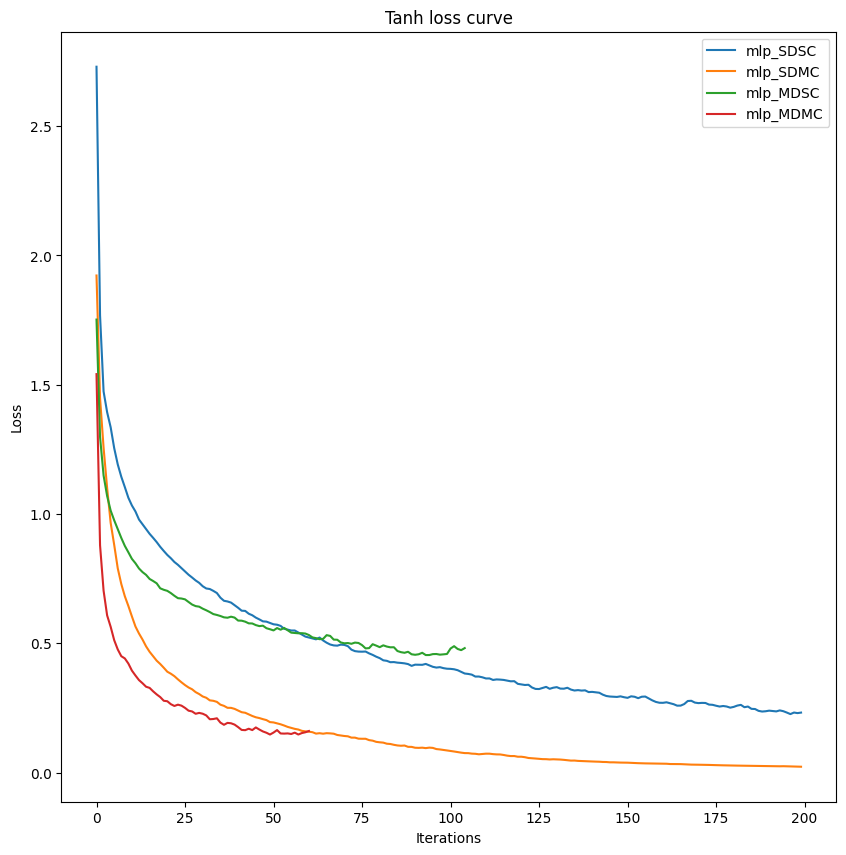

{'name': 'mlp_SDSC', 'accuracy': 0.5643564356435643, 'precision': 0.5751444393834056, 'recall': 0.5643564356435643, 'f1': 0.5554918108633293}
{'name': 'mlp_SDMC', 'accuracy': 0.7920792079207921, 'precision': 0.8023538202876891, 'recall': 0.7920792079207921, 'f1': 0.7817240139855569}
{'name': 'mlp_MDSC', 'accuracy': 0.6732673267326733, 'precision': 0.6825396825396826, 'recall': 0.6732673267326733, 'f1': 0.6715062579849893}
{'name': 'mlp_MDMC', 'accuracy': 0.8910891089108911, 'precision': 0.8942008486562942, 'recall': 0.8910891089108911, 'f1': 0.8833460269103834}


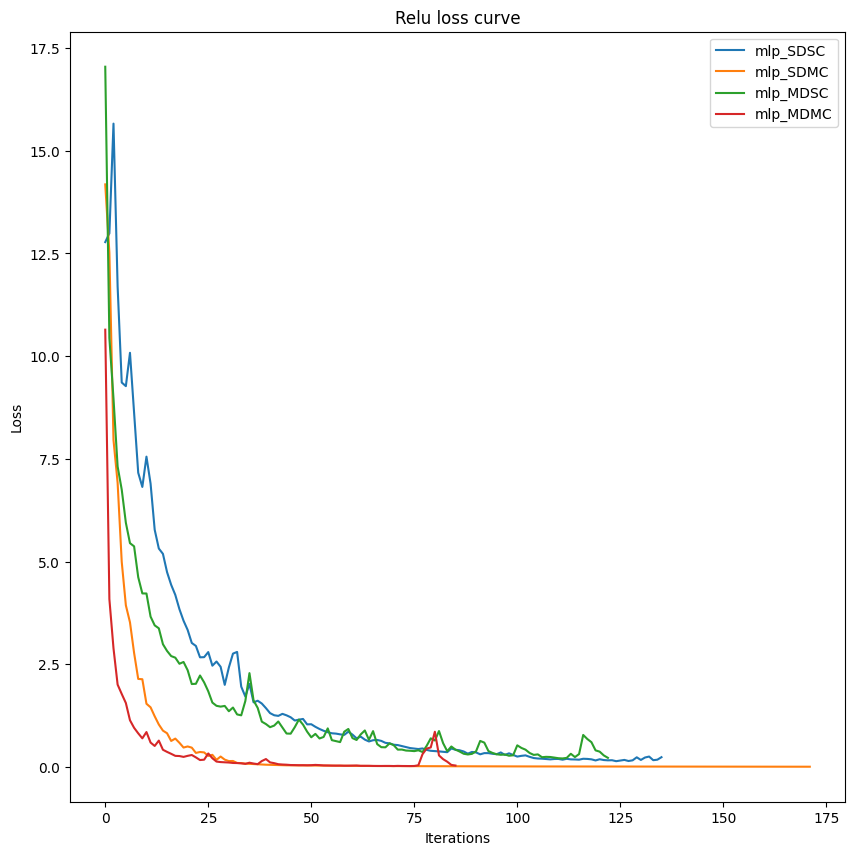

In [29]:
from matplotlib import pyplot as plt

activations = ['identity', 'logistic', 'tanh', 'relu']

config_list = [
    {
        'name': 'mlp_SDSC',
        'columns': [PM10],
        'training_datas': single_data,
        'test_datas': test_data
    },
    {
        'name': 'mlp_SDMC',
        'columns': [PM10, PM1, PM2_5],
        'training_datas': single_data,
        'test_datas': test_data
    },
    {
        'name': 'mlp_MDSC',
        'columns': [PM10],
        'training_datas': multi_data,
        'test_datas': test_data
    },
    {
        'name': 'mlp_MDMC',
        'columns': [PM10, PM1, PM2_5],
        'training_datas': multi_data,
        'test_datas': test_data
    }
]

final_result = []
for activation in activations:
    plt.figure(figsize=(10, 10))
    for config in config_list:
        acc = []
        prec = []
        rec = []
        f1_s = []
    
        knn = MyMLPClassifier()
        knn.xdxd.set_params(activation = activation)
        knn.fit_data(config['training_datas'], config['columns'])
        accuracy, precision, recall, f1 = knn.test_accuracy(config['test_datas'], config['columns'])
        acc.append(accuracy)
        prec.append(precision)
        rec.append(recall)
        f1_s.append(f1)
    
        print({'name': config['name'], 'accuracy': accuracy, 'precision': precision, 'recall': recall,
               'f1': f1})
       
        plt.plot(knn.xdxd.loss_curve_, label=config['name'])
    
        final_result.append({'name': config['name'],
                             'acc': acc,
                             'prec': prec,
                             'recall': rec,
                             'f1': f1_s, })
        
    plt.title(activation.title() + " loss curve")
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    # plt.ylim(0.0, 1.1)
    plt.legend()
    plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV
from numpy.ma import product


def generate_hidden_layer_sizes():
    # Rozmiary warstw od 10 do 100 z krokiem co 10
    sizes = range(10, 105, 10)

    # Wszystkie rozmiary dla jednej warstwy
    one_layer_sizes = [(size,) for size in sizes]

    # Wszystkie rozmiary dla dwóch warstw
    two_layer_sizes = [(size1, size2) for size1 in sizes for size2 in sizes]

    # Łączenie wszystkich konfiguracji
    all_sizes = one_layer_sizes + two_layer_sizes

    return all_sizes


config_list_test = [
    {
        'name': 'mlp_SDSC',
        'columns': [PM10],
        'training_datas': single_data,
        'test_datas': test_data
    },
    {
        'name': 'mlp_SDMC',
        'columns': [PM10, PM1, PM2_5],
        'training_datas': single_data,
        'test_datas': test_data
    },
    {
        'name': 'mlp_MDSC',
        'columns': [PM10],
        'training_datas': multi_data,
        'test_datas': test_data
    },
    {
        'name': 'mlp_MDMC',
        'columns': [PM10, PM1, PM2_5],
        'training_datas': multi_data,
        'test_datas': test_data
    }
]

# Generowanie konfiguracji hidden_layer_sizes
hidden_layer_sizes = generate_hidden_layer_sizes()
print(len(hidden_layer_sizes))

# Definiowanie przestrzeni parametrów

for activation in activations:
    parameter_space = {
        'hidden_layer_sizes': hidden_layer_sizes,
        'activation': [activation],
        'solver': ['sgd', 'adam'],
        'max_iter': [1000],
        'random_state': [1]
    }

    for config in config_list_test:
        name = config['name']
        # Inicjalizacja MLPClassifier
        mlp = MLPClassifier()

        # Inicjalizacja GridSearchCV
        clf = GridSearchCV(mlp, parameter_space, n_jobs=10, cv=3)

        X, y = prepare_dataset(config['training_datas'], config['columns'])
        X = flatten_data(X)
        # Trenowanie modelu
        clf.fit(X, y)

        # Najlepsze parametry
        print(f'[{name}] Best parameters found: \n {clf.best_params_}')


# Testy dla zdefiniowanych przez GridSearch parametrów 

In [9]:
from matplotlib import pyplot as plt

{'name': 'mlp_SDSC', 'activation': 'identity', 'accuracy': 0.49504950495049505, 'precision': 0.4803727431566686, 'recall': 0.49504950495049505, 'f1': 0.4835831409227879}
{'name': 'mlp_SDMC', 'activation': 'identity', 'accuracy': 0.8118811881188119, 'precision': 0.816628437037252, 'recall': 0.8118811881188119, 'f1': 0.7701317500171069}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_MDSC', 'activation': 'identity', 'accuracy': 0.5742574257425742, 'precision': 0.4824561403508772, 'recall': 0.5742574257425742, 'f1': 0.5164905566186871}
{'name': 'mlp_MDMC', 'activation': 'identity', 'accuracy': 0.801980198019802, 'precision': 0.7598668487538409, 'recall': 0.801980198019802, 'f1': 0.7676798146852326}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_SDSC', 'activation': 'logistic', 'accuracy': 0.594059405940594, 'precision': 0.5660507227193308, 'recall': 0.594059405940594, 'f1': 0.5313613095055636}
{'name': 'mlp_SDMC', 'activation': 'logistic', 'accuracy': 0.7623762376237624, 'precision': 0.7851485148514851, 'recall': 0.7623762376237624, 'f1': 0.7239757810367502}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_MDSC', 'activation': 'logistic', 'accuracy': 0.6435643564356436, 'precision': 0.585209750483245, 'recall': 0.6435643564356436, 'f1': 0.6070111269939161}
{'name': 'mlp_MDMC', 'activation': 'logistic', 'accuracy': 0.8217821782178217, 'precision': 0.7607083288974059, 'recall': 0.8217821782178217, 'f1': 0.7797753688412319}
{'name': 'mlp_SDSC', 'activation': 'tanh', 'accuracy': 0.5544554455445545, 'precision': 0.5550901243970552, 'recall': 0.5544554455445545, 'f1': 0.5464326432643264}
{'name': 'mlp_SDMC', 'activation': 'tanh', 'accuracy': 0.801980198019802, 'precision': 0.7594821020563594, 'recall': 0.801980198019802, 'f1': 0.7557346885130991}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_MDSC', 'activation': 'tanh', 'accuracy': 0.6138613861386139, 'precision': 0.5021154289341977, 'recall': 0.6138613861386139, 'f1': 0.5457993220136492}
{'name': 'mlp_MDMC', 'activation': 'tanh', 'accuracy': 0.8514851485148515, 'precision': 0.8327832783278328, 'recall': 0.8514851485148515, 'f1': 0.8174015748119908}
{'name': 'mlp_SDSC', 'activation': 'relu', 'accuracy': 0.5841584158415841, 'precision': 0.5254400440044005, 'recall': 0.5841584158415841, 'f1': 0.5395282031520269}
{'name': 'mlp_SDMC', 'activation': 'relu', 'accuracy': 0.7128712871287128, 'precision': 0.6761511865472262, 'recall': 0.7128712871287128, 'f1': 0.6856273500239015}
{'name': 'mlp_MDSC', 'activation': 'relu', 'accuracy': 0.7821782178217822, 'precision': 0.7738708486233239, 'recall': 0.7821782178217822, 'f1': 0.7737230119571603}
{'name': 'mlp_MDMC', 'activation': 'relu', 'accuracy': 0.8910891089108911, 'precision': 0.9113945292834369, 'recall': 0.8910891089108911, 'f1': 0.8650803254300987}


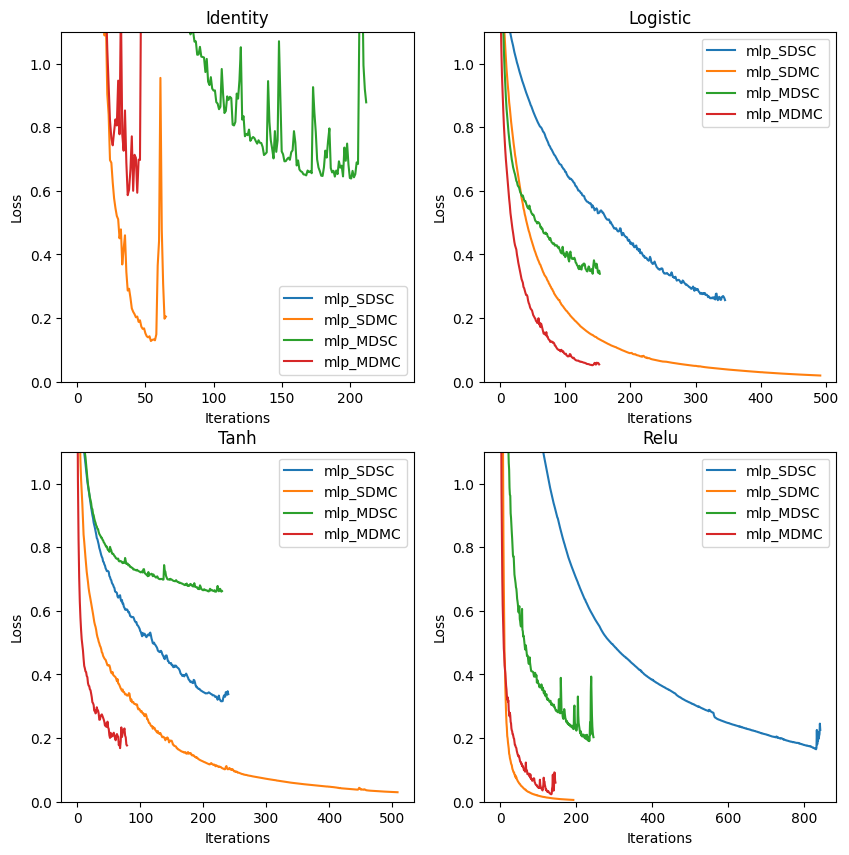

In [40]:
config_list_test = [
    {
        'name': 'mlp_SDSC',
        'columns': [PM10],
        'training_datas': single_data,
        'test_datas': test_data,
        'subplot': 1,
    },
    {
        'name': 'mlp_SDMC',
        'columns': [PM10, PM1, PM2_5],
        'training_datas': single_data,
        'test_datas': test_data,
        'subplot': 2,
    },
    {
        'name': 'mlp_MDSC',
        'columns': [PM10],
        'training_datas': multi_data,
        'test_datas': test_data,
        'subplot': 3,
    },
    {
        'name': 'mlp_MDMC',
        'columns': [PM10, PM1, PM2_5],
        'training_datas': multi_data,
        'test_datas': test_data,
        'subplot': 4,
    }
]

definied_params = {
    'mlp_SDSC': [
        {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
    ],

    'mlp_SDMC': [
        {'activation': 'identity', 'hidden_layer_sizes': (100,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'tanh', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'relu', 'hidden_layer_sizes': (90, 80), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
    ],
    ' mlp_MDSC': [
        {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'logistic', 'hidden_layer_sizes': (70, 100), 'max_iter': 1000, 'random_state': 42,
         'solver': 'sgd'},
        {'activation': 'tanh', 'hidden_layer_sizes': (10, 50), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'relu', 'hidden_layer_sizes': (30, 40), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
    ],
    'mlp_MDMC': [
        {'activation': 'identity', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'logistic', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'tanh', 'hidden_layer_sizes': (30, 80), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'relu', 'hidden_layer_sizes': (40, 100), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
    ]
}

xxx_adam = [
    ['identity', {
        'mlp_SDSC': {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 10000, 'random_state': 42,
                     'solver': 'adam', 'n_iter_no_change': 10},
        'mlp_SDMC': {'activation': 'identity', 'hidden_layer_sizes': (100,), 'max_iter': 10000, 'random_state': 42,
                     'solver': 'adam', 'n_iter_no_change': 10},
        'mlp_MDSC': {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 10000, 'random_state': 42,
                     'solver': 'adam', 'n_iter_no_change': 10},
        'mlp_MDMC': {'activation': 'identity', 'hidden_layer_sizes': (40,), 'max_iter': 10000, 'random_state': 42,
                     'solver': 'adam', 'n_iter_no_change': 10},
    }, ], [
        'logistic', {
            'mlp_SDSC': {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},
            'mlp_SDMC': {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},
            'mlp_MDSC': {'activation': 'logistic', 'hidden_layer_sizes': (70, 100), 'max_iter': 10000,
                         'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},
            'mlp_MDMC': {'activation': 'logistic', 'hidden_layer_sizes': (40,), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},
        }, ], [
        'tanh', {
            'mlp_SDSC': {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},

            'mlp_SDMC': {'activation': 'tanh', 'hidden_layer_sizes': (40,), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},

            'mlp_MDSC': {'activation': 'tanh', 'hidden_layer_sizes': (10, 50), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},
            'mlp_MDMC': {'activation': 'tanh', 'hidden_layer_sizes': (30, 80), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},
        }, ], [
        'relu', {
            'mlp_SDSC': {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},
            'mlp_SDMC': {'activation': 'relu', 'hidden_layer_sizes': (90, 80), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},
            'mlp_MDSC': {'activation': 'relu', 'hidden_layer_sizes': (30, 40), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},
            'mlp_MDMC': {'activation': 'relu', 'hidden_layer_sizes': (40, 100), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'adam', 'n_iter_no_change': 10},
        }
    ]
]


xxx_sgd = [
    ['identity', {
        'mlp_SDSC': {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 10000, 'random_state': 42,
                     'solver': 'sgd', 'n_iter_no_change': 10},
        'mlp_SDMC': {'activation': 'identity', 'hidden_layer_sizes': (100,), 'max_iter': 10000, 'random_state': 42,
                     'solver': 'sgd', 'n_iter_no_change': 10},
        'mlp_MDSC': {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 10000, 'random_state': 42,
                     'solver': 'sgd', 'n_iter_no_change': 10},
        'mlp_MDMC': {'activation': 'identity', 'hidden_layer_sizes': (40,), 'max_iter': 10000, 'random_state': 42,
                     'solver': 'sgd', 'n_iter_no_change': 10},
    }, ], [
        'logistic', {
            'mlp_SDSC': {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},
            'mlp_SDMC': {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},
            'mlp_MDSC': {'activation': 'logistic', 'hidden_layer_sizes': (70, 100), 'max_iter': 10000,
                         'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},
            'mlp_MDMC': {'activation': 'logistic', 'hidden_layer_sizes': (40,), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},
        }, ], [
        'tanh', {
            'mlp_SDSC': {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},

            'mlp_SDMC': {'activation': 'tanh', 'hidden_layer_sizes': (40,), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},

            'mlp_MDSC': {'activation': 'tanh', 'hidden_layer_sizes': (10, 50), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},
            'mlp_MDMC': {'activation': 'tanh', 'hidden_layer_sizes': (30, 80), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},
        }, ], [
        'relu', {
            'mlp_SDSC': {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},
            'mlp_SDMC': {'activation': 'relu', 'hidden_layer_sizes': (90, 80), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},
            'mlp_MDSC': {'activation': 'relu', 'hidden_layer_sizes': (30, 40), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},
            'mlp_MDMC': {'activation': 'relu', 'hidden_layer_sizes': (40, 100), 'max_iter': 10000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change': 10},
        }
    ]
]
labels = ['identity', 'logistic', 'tanh', 'relu']

scaler_results = []
plt.figure(figsize=(10, 10))
subplot = 1
for activation in xxx_adam:
    activation_name = activation[0]
    params = activation[1]

    plt.subplot(2, 2, subplot)
    plt.title(activation_name.title())

    for config in config_list_test:
        name = config['name']
        knn = MyMLPClassifier()
        knn.xdxd.set_params(**params[name])
        knn.fit_data(config['training_datas'], config['columns'])
        accuracy, precision, recall, f1 = knn.test_accuracy(config['test_datas'], config['columns'])

        print({'name': name, 'activation': activation_name, 'accuracy': accuracy, 'precision': precision,
               'recall': recall,
               'f1': f1})
        plt.plot(knn.xdxd.loss_curve_, label=name)
        
        

        scaler_results.append({'name': name, 'activation': activation_name, 'shape' : params[name]['hidden_layer_sizes'],'accuracy': accuracy, 'precision': precision,
                       'recall': recall,
                       'f1': f1})

    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.ylim(0.0, 1.1)
    subplot += 1
plt.show()




In [41]:
for end in scaler_results:
    print(end['name'].split('_')[1] + " & " + str(end['activation']).title()+ " & " + str(end['shape'])+ " & " + 'Adam' + " & " + str(round(end['accuracy'], 2)) + " & " + str(
        round(end['precision'], 2)) + " & " + str(round(end['recall'], 2)) + " & " + str(round(end['f1'], 2)) + "\\\\")
    print("\\hline")

SDSC & Identity & (10,) & Adam & 0.5 & 0.48 & 0.5 & 0.48\\
\hline
SDMC & Identity & (100,) & Adam & 0.81 & 0.82 & 0.81 & 0.77\\
\hline
MDSC & Identity & (10,) & Adam & 0.57 & 0.48 & 0.57 & 0.52\\
\hline
MDMC & Identity & (40,) & Adam & 0.8 & 0.76 & 0.8 & 0.77\\
\hline
SDSC & Logistic & (50,) & Adam & 0.59 & 0.57 & 0.59 & 0.53\\
\hline
SDMC & Logistic & (50,) & Adam & 0.76 & 0.79 & 0.76 & 0.72\\
\hline
MDSC & Logistic & (70, 100) & Adam & 0.64 & 0.59 & 0.64 & 0.61\\
\hline
MDMC & Logistic & (40,) & Adam & 0.82 & 0.76 & 0.82 & 0.78\\
\hline
SDSC & Tanh & (30, 50) & Adam & 0.55 & 0.56 & 0.55 & 0.55\\
\hline
SDMC & Tanh & (40,) & Adam & 0.8 & 0.76 & 0.8 & 0.76\\
\hline
MDSC & Tanh & (10, 50) & Adam & 0.61 & 0.5 & 0.61 & 0.55\\
\hline
MDMC & Tanh & (30, 80) & Adam & 0.85 & 0.83 & 0.85 & 0.82\\
\hline
SDSC & Relu & (20, 10) & Adam & 0.58 & 0.53 & 0.58 & 0.54\\
\hline
SDMC & Relu & (90, 80) & Adam & 0.71 & 0.68 & 0.71 & 0.69\\
\hline
MDSC & Relu & (30, 40) & Adam & 0.78 & 0.77 & 0.78 & 0.77\\

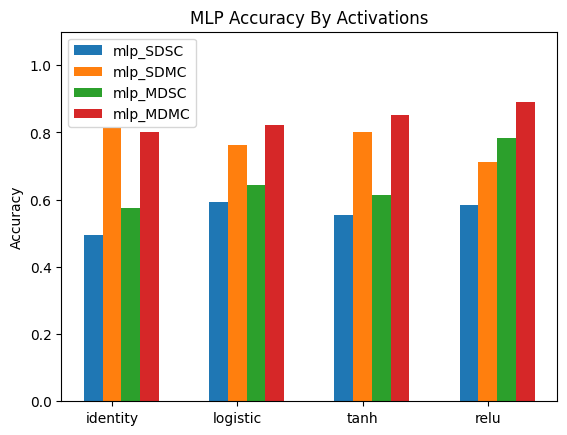

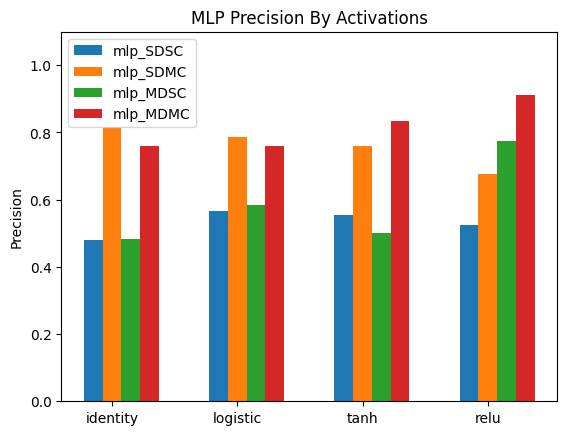

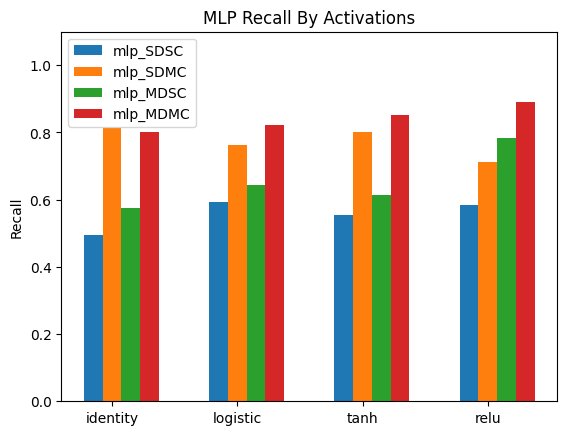

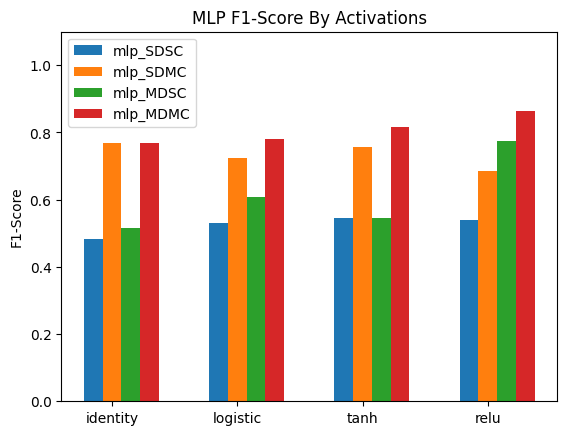

In [42]:
x_labels = labels
x = np.arange(len(x_labels))
width = 0.15
multiplier = 0

variants = {
    'mlp_SDSC': [x for x in scaler_results if x['name'] == 'mlp_SDSC'],
    'mlp_SDMC': [x for x in scaler_results if x['name'] == 'mlp_SDMC'],
    'mlp_MDSC': [x for x in scaler_results if x['name'] == 'mlp_MDSC'],
    'mlp_MDMC': [x for x in scaler_results if x['name'] == 'mlp_MDMC'],
}

fig, ax = plt.subplots()
for key, value in variants.items():
    offset = width * multiplier
    xvalues = [x['accuracy'] for x in value]
    rects = ax.bar(x + offset, xvalues, width, label=key)
    # ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('Accuracy')
ax.set_title('MLP Accuracy By Activations')
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', )
ax.set_ylim(0, 1.1)
plt.show()

fig, ax = plt.subplots()
multiplier = 0
for key, value in variants.items():
    offset = width * multiplier
    xvalues = [x['precision'] for x in value]
    rects = ax.bar(x + offset, xvalues, width, label=key)
    # ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('Precision')
ax.set_title('MLP Precision By Activations')
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', )
ax.set_ylim(0, 1.1)
plt.show()

fig, ax = plt.subplots()
multiplier = 0
for key, value in variants.items():
    offset = width * multiplier
    xvalues = [x['recall'] for x in value]
    rects = ax.bar(x + offset, xvalues, width, label=key)
    # ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('Recall')
ax.set_title('MLP Recall By Activations')
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', )
ax.set_ylim(0, 1.1)
plt.show()

fig, ax = plt.subplots()
multiplier = 0
for key, value in variants.items():
    offset = width * multiplier
    xvalues = [x['f1'] for x in value]
    rects = ax.bar(x + offset, xvalues, width, label=key)
    # ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('F1-Score')
ax.set_title('MLP F1-Score By Activations')
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', )
ax.set_ylim(0, 1.1)
plt.show()

/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


{'alpha': 0.0001, 'name': 'mlp_SDMC', 'activation': 'logistic', 'accuracy': 0.7524752475247525, 'precision': 0.7213342762847712, 'recall': 0.7524752475247525, 'f1': 0.6779464018619991}



KeyboardInterrupt



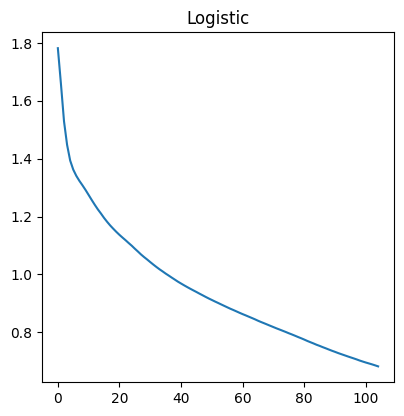

In [21]:
# fine_config = [
#     {
#         'name': 'mlp_SDMC',
#         'columns': [PM10, PM1, PM2_5],
#         'training_datas': single_data,
#         'test_datas': test_data,
#         'subplot': 2,
#     },
#     {
#         'name': 'mlp_MDMC',
#         'columns': [PM10, PM1, PM2_5],
#         'training_datas': multi_data,
#         'test_datas': test_data,
#         'subplot': 4,
#     }
# ]
# 
# fine_params = {
#     'mlp_SDMC': {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 10000, 'random_state': 42,
#                  'solver': 'sgd', 'n_iter_no_change': 100},
#     'mlp_MDMC': {'activation': 'logistic', 'hidden_layer_sizes': (40,), 'max_iter': 10000, 'random_state': 42,
#                  'solver': 'sgd', 'n_iter_no_change': 100},
# }
# 
# alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# 
# plt.figure(figsize=(10, 10))
# subplot = 1
# 
# 
# for alpha in alphas:
#     activation_name = 'logistic'
# 
#     plt.subplot(2, 2, subplot)
#     plt.title(activation_name.title())
# 
#     for config in fine_config:
#         name = config['name']
#         params = fine_params[name]
#         knn = MyMLPClassifier()
#         knn.xdxd.set_params(**params)
#         knn.fit_data(config['training_datas'], config['columns'])
#         accuracy, precision, recall, f1 = knn.test_accuracy(config['test_datas'], config['columns'])
# 
#         print({'alpha': alpha, 'name': name, 'activation': activation_name, 'accuracy': accuracy, 'precision': precision,
#                'recall': recall,
#                'f1': f1})
#         label = name + " alpha:" + str(alpha)
#         plt.plot(knn.xdxd.loss_curve_, label=label)
# 
#     plt.legend()
#     plt.xlabel('Iterations')
#     plt.ylabel('Loss')
#     plt.ylim(0.0, 1.1)
#     subplot += 1
# plt.show()


# Final results in form of table

In [43]:
for r in scaler_results:
    tmp = [x for x in xxx if x[0] == r['activation']][0][1]
    
    shape = tmp[r['name']]['hidden_layer_sizes']
    shape = str(shape)
   
    print(r['name'] + " & " + r['activation'] + " & " + str(shape) + " & " + str(round(r['accuracy'], 2)) + " & " + str(round(r['precision'], 2))  + " & "  + str(round(r['recall'], 2)) + " & " + str(round(r['f1'], 2)))


mlp_SDSC & identity & (10,) & 0.58 & 0.62 & 0.58 & 0.56
mlp_SDMC & identity & (100,) & 0.77 & 0.78 & 0.77 & 0.76
mlp_MDSC & identity & (10,) & 0.47 & 0.56 & 0.47 & 0.48
mlp_MDMC & identity & (40,) & 0.77 & 0.76 & 0.77 & 0.74
mlp_SDSC & logistic & (50,) & 0.68 & 0.64 & 0.68 & 0.61
mlp_SDMC & logistic & (50,) & 0.76 & 0.67 & 0.76 & 0.69
mlp_MDSC & logistic & (70, 100) & 0.73 & 0.61 & 0.73 & 0.66
mlp_MDMC & logistic & (40,) & 0.82 & 0.83 & 0.82 & 0.79
mlp_SDSC & tanh & (30, 50) & 0.66 & 0.56 & 0.66 & 0.6
mlp_SDMC & tanh & (40,) & 0.68 & 0.6 & 0.68 & 0.62
mlp_MDSC & tanh & (10, 50) & 0.72 & 0.63 & 0.72 & 0.65
mlp_MDMC & tanh & (30, 80) & 0.86 & 0.85 & 0.86 & 0.83
mlp_SDSC & relu & (20, 10) & 0.74 & 0.71 & 0.74 & 0.71
mlp_SDMC & relu & (90, 80) & 0.8 & 0.8 & 0.8 & 0.76
mlp_MDSC & relu & (30, 40) & 0.78 & 0.77 & 0.78 & 0.75
mlp_MDMC & relu & (40, 100) & 0.85 & 0.87 & 0.85 & 0.82


In [ ]:
'''
[mlp_SDSC] Best parameters found:
 {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDMC] Best parameters found:
 {'activation': 'identity', 'hidden_layer_sizes': (100,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDSC] Best parameters found:
 {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDMC] Best parameters found:
 {'activation': 'identity', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDSC] Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDMC] Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDSC] Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (70, 100), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDMC] Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDSC] Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDMC] Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDSC] Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (10, 50), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDMC] Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (30, 80), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDSC] Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDMC] Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (90, 80), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDSC] Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (30, 40), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDMC] Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (40, 100), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
 '''

# SCALER TEST

In [13]:
# from sklearn import preprocessing
# 
# config_list_test = [
#     {
#         'name': 'mlp_SDSC',
#         'columns': [PM10],
#         'training_datas': single_data,
#         'test_datas': test_data,
#         'subplot': 1,
#     },
#     {
#         'name': 'mlp_SDMC',
#         'columns': [PM10, PM1, PM2_5],
#         'training_datas': single_data,
#         'test_datas': test_data,
#         'subplot': 2,
#     },
#     {
#         'name': 'mlp_MDSC',
#         'columns': [PM10],
#         'training_datas': multi_data,
#         'test_datas': test_data,
#         'subplot': 3,
#     },
#     {
#         'name': 'mlp_MDMC',
#         'columns': [PM10, PM1, PM2_5],
#         'training_datas': multi_data,
#         'test_datas': test_data,
#         'subplot': 4,
#     }
# ]
# 
# definied_params = {
#     'mlp_SDSC': [
#         {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
#         {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
#         {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
#         {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
#     ],
# 
#     'mlp_SDMC': [
#         {'activation': 'identity', 'hidden_layer_sizes': (100,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
#         {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
#         {'activation': 'tanh', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
#         {'activation': 'relu', 'hidden_layer_sizes': (90, 80), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
#     ],
#     ' mlp_MDSC': [
#         {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
#         {'activation': 'logistic', 'hidden_layer_sizes': (70, 100), 'max_iter': 1000, 'random_state': 42,
#          'solver': 'sgd'},
#         {'activation': 'tanh', 'hidden_layer_sizes': (10, 50), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
#         {'activation': 'relu', 'hidden_layer_sizes': (30, 40), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
#     ],
#     'mlp_MDMC': [
#         {'activation': 'identity', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
#         {'activation': 'logistic', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
#         {'activation': 'tanh', 'hidden_layer_sizes': (30, 80), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
#         {'activation': 'relu', 'hidden_layer_sizes': (40, 100), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
#     ]
# }
# 
# xxx = [
#     ['identity', {
#         'mlp_SDSC': {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42,
#                      'solver': 'sgd', 'n_iter_no_change': 100},
#         'mlp_SDMC': {'activation': 'identity', 'hidden_layer_sizes': (100,), 'max_iter': 1000, 'random_state': 42,
#                      'solver': 'sgd', 'n_iter_no_change': 100},
#         'mlp_MDSC': {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42,
#                      'solver': 'sgd', 'n_iter_no_change': 100},
#         'mlp_MDMC': {'activation': 'identity', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42,
#                      'solver': 'sgd', 'n_iter_no_change': 100},
#     }, ], [
#         'logistic', {
#             'mlp_SDSC': {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
#             'mlp_SDMC': {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
#             'mlp_MDSC': {'activation': 'logistic', 'hidden_layer_sizes': (70, 100), 'max_iter': 1000,
#                          'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
#             'mlp_MDMC': {'activation': 'logistic', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
#         }, ], [
#         'tanh', {
#             'mlp_SDSC': {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 1000, 'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
# 
#             'mlp_SDMC': {'activation': 'tanh', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
# 
#             'mlp_MDSC': {'activation': 'tanh', 'hidden_layer_sizes': (10, 50), 'max_iter': 1000, 'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
#             'mlp_MDMC': {'activation': 'tanh', 'hidden_layer_sizes': (30, 80), 'max_iter': 1000, 'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
#         }, ], [
#         'relu', {
#             'mlp_SDSC': {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 1000, 'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
#             'mlp_SDMC': {'activation': 'relu', 'hidden_layer_sizes': (90, 80), 'max_iter': 1000, 'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
#             'mlp_MDSC': {'activation': 'relu', 'hidden_layer_sizes': (30, 40), 'max_iter': 1000, 'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
#             'mlp_MDMC': {'activation': 'relu', 'hidden_layer_sizes': (40, 100), 'max_iter': 1000, 'random_state': 42,
#                          'solver': 'sgd', 'n_iter_no_change': 100},
#         }
#     ]
# ]
# labels = ['identity', 'logistic', 'tanh', 'relu']
# 
# scaler_results = []
# plt.figure(figsize=(10, 10))
# subplot = 1
# for activation in xxx:
#     activation_name = activation[0]
#     params = activation[1]
# 
#     plt.subplot(2, 2, subplot)
#     plt.title(activation_name.title())
# 
#     for config in config_list_test:
#         name = config['name']
#         knn = MyMLPClassifier()
#         knn.xdxd.set_params(**params[name])
#         
#         
#         X, y = prepare_dataset(config['training_datas'], config['columns'])
#         X = flatten_data(X)
#         scaler = preprocessing.StandardScaler().fit(X)
#         scaled = scaler.transform(X)
#         
#         knn.xdxd.fit(scaled, y)
#         accuracy, precision, recall, f1 = knn.test_accuracy(config['test_datas'], config['columns'])
# 
#         print({'name': name, 'activation': activation_name, 'accuracy': accuracy, 'precision': precision,
#                'recall': recall,
#                'f1': f1})
#         plt.plot(knn.xdxd.loss_curve_, label=name)
# 
#         scaler_results.append({'name': name, 'activation': activation_name, 'accuracy': accuracy, 'precision': precision,
#                        'recall': recall,
#                        'f1': f1})
# 
#     plt.legend()
#     plt.xlabel('Iterations')
#     plt.ylabel('Loss')
#     plt.ylim(0.0, 1.1)
#     subplot += 1
# plt.show()
# 



/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_SDSC', 'activation': 'identity', 'accuracy': 0.10891089108910891, 'precision': 0.1874359849778081, 'recall': 0.10891089108910891, 'f1': 0.05103135313531353}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_SDMC', 'activation': 'identity', 'accuracy': 0.27722772277227725, 'precision': 0.6378744203534277, 'recall': 0.27722772277227725, 'f1': 0.25958370562330957}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_MDSC', 'activation': 'identity', 'accuracy': 0.0891089108910891, 'precision': 0.009218163195629908, 'recall': 0.0891089108910891, 'f1': 0.01670792079207921}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_MDMC', 'activation': 'identity', 'accuracy': 0.2079207920792079, 'precision': 0.23715783343040187, 'recall': 0.2079207920792079, 'f1': 0.14425305050963363}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_SDSC', 'activation': 'logistic', 'accuracy': 0.0891089108910891, 'precision': 0.00901101346089665, 'recall': 0.0891089108910891, 'f1': 0.016366942816730654}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_SDMC', 'activation': 'logistic', 'accuracy': 0.18811881188118812, 'precision': 0.18623845577835096, 'recall': 0.18811881188118812, 'f1': 0.13236493862152174}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_MDSC', 'activation': 'logistic', 'accuracy': 0.4752475247524752, 'precision': 0.22586020978335455, 'recall': 0.4752475247524752, 'f1': 0.3061997474915277}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")

KeyboardInterrupt



Error in callback <function flush_figures at 0x7119ff6e9c60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 